# 20.5 8 Machine Learning (DL) Prototype 3

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import *
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns
import joblib

### best performing models from comparison testing

In [3]:
linear_model='SGDRegressor'

In [4]:
feature_model='GradientBoostingRegressor'
feature_columns=['cash_flow', 'gross_revenue']
feature_columns2=['gross_revenue']

### load processed bizbuysell dataset

In [5]:
df_in=pd.read_parquet('data/bizwiz_value_score_2.parquet')

In [6]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12143 entries, 1427 to 36567
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     12143 non-null  float64
 1   pptitle                                12143 non-null  object 
 2   ppdesc                                 12143 non-null  object 
 3   ppdetails                              12143 non-null  object 
 4   ppfinancials                           12143 non-null  object 
 5   pcategories                            12143 non-null  object 
 6   COUNTY_NAME                            12143 non-null  object 
 7   STATE_NAME                             12143 non-null  object 
 8   price                                  12143 non-null  float64
 9   cash_flow                              12143 non-null  float64
 10  gross_revenue                          12143 non-null  float64
 11  esta

# text model

### vectorize text

In [7]:
vect_text=TfidfVectorizer(stop_words='english',ngram_range=(1, 2),max_df=0.5,min_df=20)

In [8]:
text= df_in.pptitle + ' ' + df_in.ppdesc + ' ' + df_in.ppdetails + ' ' + df_in.ppfinancials 

In [9]:
%time X_text = vect_text.fit_transform(text)

CPU times: user 4.73 s, sys: 0 ns, total: 4.73 s
Wall time: 4.7 s


In [10]:
X_text.shape

(12143, 13646)

### test train split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_text, df_in.price,random_state=1)

In [12]:
regr= SGDRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
tr2=r2_score(y_test,y_pred)

In [13]:
tr2

0.3241745628774694

# feature model

In [14]:
df_f=df_in[feature_columns]

In [15]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(df_f, df_in.price,random_state=1)

In [16]:
regrf= GradientBoostingRegressor()
regrf.fit(Xf_train, yf_train)
yf_pred = regrf.predict(Xf_test)
fr2=r2_score(yf_test,yf_pred)

In [17]:
fr2

0.6018403101993004

## feature model 2

In [18]:
df_f2=df_in[feature_columns2]

In [19]:
Xf2_train, Xf2_test, yf2_train, yf2_test = train_test_split(df_f2, df_in.price,random_state=1)

In [20]:
regrf2= GradientBoostingRegressor()
regrf2.fit(Xf2_train, yf2_train)
yf2_pred = regrf2.predict(Xf2_test)
f2r2=r2_score(yf2_test,yf2_pred)

In [21]:
f2r2

0.4493732482052831

## feature+text 1

In [22]:
pred_text= regr.predict(X_text)

In [23]:
pred_text.shape

(12143,)

In [24]:
df_pred_text_price=pd.DataFrame(pred_text,columns=['text_price'],index=df_in.index)

In [25]:
df_pred_text_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12143 entries, 1427 to 36567
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text_price  12143 non-null  float64
dtypes: float64(1)
memory usage: 189.7 KB


In [26]:
df_ft=pd.concat([df_in[feature_columns],df_pred_text_price],axis=1)

In [27]:
df_ft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12143 entries, 1427 to 36567
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cash_flow      12143 non-null  float64
 1   gross_revenue  12143 non-null  float64
 2   text_price     12143 non-null  float64
dtypes: float64(3)
memory usage: 379.5 KB


In [28]:
df_ft.head()

,cash_flow,gross_revenue,text_price
1427,123452.0,254352.0,288270.890703
1428,221000.0,1310000.0,218815.407670
1438,0.0,500000.0,244933.769291
1440,140478.0,594681.0,317743.692925
1444,75900.0,160000.0,633541.626788


In [29]:
Xft_train, Xft_test, yft_train, yft_test = train_test_split(df_ft, df_in.price,random_state=1)

In [30]:
regrft= GradientBoostingRegressor()
regrft.fit(Xft_train, yft_train)
yft_pred = regrft.predict(Xft_test)
ftr2=r2_score(yft_test,yft_pred)

In [31]:
ftr2

0.6099913760254531

## feature+text 2

In [32]:
df_ft2=pd.concat([df_in[feature_columns2],df_pred_text_price],axis=1)

In [33]:
df_ft2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12143 entries, 1427 to 36567
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gross_revenue  12143 non-null  float64
 1   text_price     12143 non-null  float64
dtypes: float64(2)
memory usage: 284.6 KB


In [34]:
Xft2_train, Xft2_test, yft2_train, yft2_test = train_test_split(df_ft2, df_in.price,random_state=1)

In [35]:
yft2_test.info()

<class 'pandas.core.series.Series'>
Index: 3036 entries, 36231 to 4380
Series name: price
Non-Null Count  Dtype  
--------------  -----  
3036 non-null   float64
dtypes: float64(1)
memory usage: 47.4 KB


In [36]:
regrft2= GradientBoostingRegressor()
regrft2.fit(Xft2_train, yft2_train)
yft2_pred = regrft2.predict(Xft2_test)
ft2r2=r2_score(yft2_test,yft2_pred)

In [37]:
ft2r2

0.5006534250928668

## feature plus+text test a range of models

In [38]:
ensemble_models=['GradientBoostingRegressor','HistGradientBoostingRegressor','RandomForestRegressor',
                'ExtraTreesRegressor','BaggingRegressor']

In [39]:
def test_model(model, X_train, y_train, X_test, y_test):
    print(f'testing {model}...')
    regr_= eval(model)()
    regr_.fit(X_train, y_train)
    y_pred = regr_.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(f'{model}: {r2}')
    return r2

In [40]:
em_r2_scores={}

In [41]:
for m in ensemble_models:
   em_r2_scores[m]=test_model(m,Xft_train,yft_train, Xft_test, yft_test)

testing GradientBoostingRegressor...
GradientBoostingRegressor: 0.6101356711650938
testing HistGradientBoostingRegressor...
HistGradientBoostingRegressor: 0.6091697696959355
testing RandomForestRegressor...
RandomForestRegressor: 0.5980297000349521
testing ExtraTreesRegressor...
ExtraTreesRegressor: 0.5753274303626235
testing BaggingRegressor...
BaggingRegressor: 0.5687753497697587


In [42]:
dfr=pd.DataFrame.from_dict(em_r2_scores,'index')
dfr['ensemble model']=dfr.index
dfr['r2']=dfr[0]
dfr=dfr[dfr.r2 > 0]
dfr=dfr.sort_values('r2',ascending=False)

<Axes: xlabel='r2', ylabel='ensemble model'>

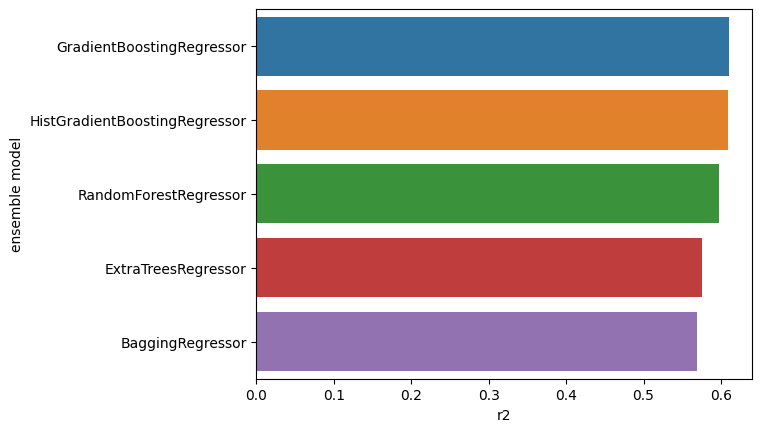

In [43]:
sns.barplot(dfr,x='r2', y='ensemble model',orient='h')

In [44]:
linear_models=['LinearRegression','Ridge','RidgeCV ',
               'Lasso','LassoCV','LassoLarsCV',
               'LassoLarsIC','ElasticNet','Lars','LassoLars',
              'OrthogonalMatchingPursuit','BayesianRidge','ARDRegression','TweedieRegressor',
               'SGDRegressor','PassiveAggressiveRegressor','RANSACRegressor',
               'HuberRegressor']

In [45]:
lm_r2_scores={}

In [46]:
for m in linear_models:
   lm_r2_scores[m]=test_model(m,Xft_train,yft_train, Xft_test, yft_test)

testing LinearRegression...
LinearRegression: 0.3248391996506699
testing Ridge...
Ridge: 0.3248391996506701
testing RidgeCV ...
RidgeCV : -1.288853795633604
testing Lasso...
Lasso: 0.3248391996525919
testing LassoCV...
LassoCV: 0.3002063534587309
testing LassoLarsCV...
LassoLarsCV: 0.2061282063409392
testing LassoLarsIC...
LassoLarsIC: 0.3248391996506699
testing ElasticNet...
ElasticNet: 0.32483919965326447
testing Lars...
Lars: 0.3248391996506699
testing LassoLars...
LassoLars: 0.3248503375349794
testing OrthogonalMatchingPursuit...
OrthogonalMatchingPursuit: 0.3139337426942306
testing BayesianRidge...
BayesianRidge: 0.3248844763577552
testing ARDRegression...
ARDRegression: 0.3246571704780945
testing TweedieRegressor...
TweedieRegressor: 0.3248392005256341
testing SGDRegressor...
SGDRegressor: -6.975954717727991e+32
testing PassiveAggressiveRegressor...
PassiveAggressiveRegressor: 0.4225374086588044
testing RANSACRegressor...
RANSACRegressor: -148.89541213402373
testing HuberRegresso

In [47]:
dfr=pd.DataFrame.from_dict(lm_r2_scores,'index')
dfr['linear model']=dfr.index
dfr['r2']=dfr[0]
dfr=dfr[dfr.r2 > 0]
dfr=dfr.sort_values('r2',ascending=False)

<Axes: xlabel='r2', ylabel='linear model'>

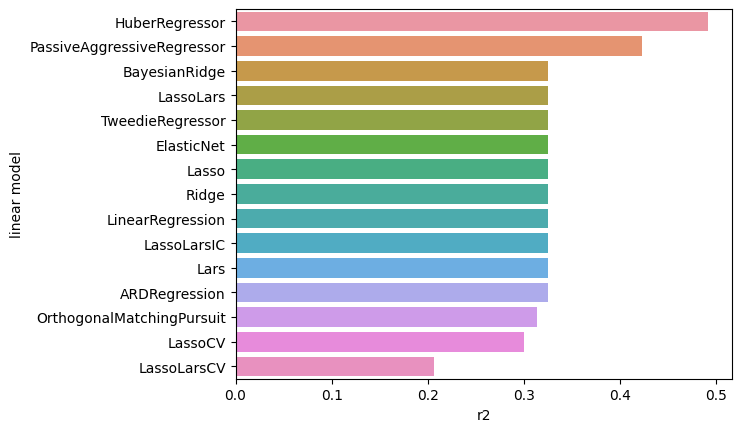

In [48]:
sns.barplot(dfr,x='r2', y='linear model',orient='h')

# save models

* text vectorizer, text model, text/gross revenue model, text/gross revenue/cash flow model
* r2 ~ .3, .5, .6

In [49]:
joblib.dump((vect_text,regr,regrft2,regrft),'data/model.final.joblib',True)

['data/model.final.joblib']

### grid search SGDRegressor

In [50]:
param_grid= {
    'alpha': 10.0 ** -np.arange(1, 3),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'early_stopping': [True],
#     'verbose':[1],
}

In [51]:
#model=SGDRegressor()

In [52]:
# clf = GridSearchCV(model, param_grid)
# clf.fit(X_train, y_train)
# print("Best score: " + str(clf.best_score_))

### score GradientBoostingRegressor

In [53]:
param_grid_f= {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [ 0.001, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth':[3, 7, 9],
#     'verbose':[1],
}

In [54]:
#model_f=GradientBoostingRegressor()

In [55]:
# clf_f = GridSearchCV(model_f, param_grid_f)
# clf_f.fit(Xf_train, yf_train)
# print("Best score: " + str(clf_f.best_score_))

* Turns out model defaults are pretty good